In [20]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt

import mandelbrot_MC as mb
from mandelbrot_MC_solvers import PureRandomSampling, LatinHypercubeSampling, OrthogonalSampling

N_RUNS_STDERR = 10

In [ ]:
xRes = 500
yRes = 500

xVals = np.linspace(-2, 2, xRes)
yVals = np.linspace(-2, 2, yRes)

out = mb.mandelbrotDomain(xVals, yVals, 50, 2, 2)

fig, ax = plt.subplots()
ax.pcolormesh(xVals, yVals, out, norm=matplotlib.colors.LogNorm())
plt.show()


In [22]:
primes = np.asarray(mb.prime_sieve(139))
pSquares = np.square(primes)
print(pSquares[8:20])

# Pure Random

In [23]:
solver = PureRandomSampling()

nIter = 20000
nSamples = 20000

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

In [24]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
print(f"Area={area}")
plt.show()

In [ ]:
solver = PureRandomSampling()

minIter = 50
maxIter = 500
iterSteps = 10

minSamples = 50
maxSamples = 500
sampleSteps = 10

nRuns = 20

samples = pSquares[8:20]
iterations = np.linspace(minIter, maxIter, iterSteps, dtype=int)

stdsPR, areasPR, areaPR = solver.iterSample_std(nRuns, iterations, samples, (20000,20000), verbose=True)

1.4792


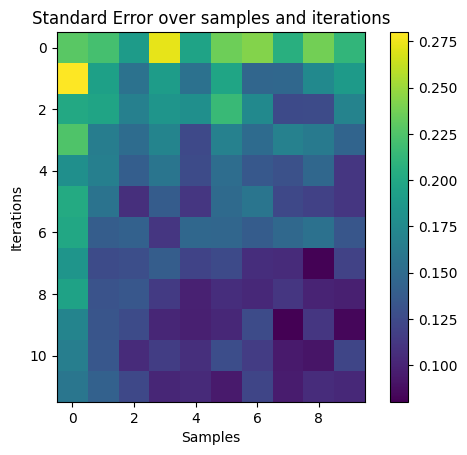

In [29]:
print(areaPR)

fig, ax = plt.subplots()

im = ax.imshow(stdsPR)

ax.set_xlabel("Samples")
# ax.set_xticks(samples)
ax.set_ylabel("Iterations")
# ax.set_yticks(iterations)
ax.set_title("Standard Error over samples and iterations")
fig.colorbar(im, ax = ax)
plt.show()

# Latin Hypercube

## Single Calculation

In [ ]:
solver = LatinHypercubeSampling(yDomain=(0,2))

nIter = 20000
nSamples = 20000

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

In [ ]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
print(f"Area={area}")
plt.show()

## Standard Error

In [ ]:
solver = LatinHypercubeSampling()

minIter = 50
maxIter = 500
iterSteps = 10

minSamples = 500
maxSamples = 5000
sampleSteps = 10

samples = pSquares[8:20]
iterations = np.linspace(minIter, maxIter, sampleSteps, dtype=int)

stdsLH, areasLH, areaLH = solver.iterSample_std(N_RUNS_STDERR, iterations, samples, (20000,20000), verbose=True)

In [ ]:
print(areaLH)
lognorm = False

fig, ax = plt.subplots()
im = ax.imshow(stdsLH)

ax.set_xlabel("Samples")
# ax.set_xticks(samples)
ax.set_ylabel("Iterations")
# ax.set_yticks(iterations)
ax.set_title("Standard Error over samples and iterations")
fig.colorbar(im, ax = ax)
plt.show()

# Orthogonal Sampling
*Can only use prime squared numbered amounts of samples*

## Single Calculation

In [ ]:
solver = OrthogonalSampling()

nIter = 20000
nSamples = 19321 # 139**2

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

In [ ]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
print(f"Area={area}")
plt.show()

In [ ]:
# TODO: Nearest prime squared number for sample points
solver = OrthogonalSampling()

minIter = 50
maxIter = 500
iterSteps = 10

minSamples = 500
maxSamples = 5000
sampleSteps = 10

nRuns = 10

samples = pSquares[8:20]
iterations = np.linspace(minIter, maxIter, sampleSteps, dtype=int)

stdsORT, areasORT, areaORT = solver.iterSample_std(nRuns, iterations, samples, trueArea=1.5469, verbose=True)

In [ ]:
print(areaORT)
lognorm = False

fig, ax = plt.subplots()
im = ax.imshow(stdsORT)

ax.set_xlabel("Samples")
# ax.set_xticks(samples)
ax.set_ylabel("Iterations")
# ax.set_yticks(iterations)
ax.set_title("Standard Error over samples and iterations")
fig.colorbar(im, ax = ax)
plt.show()

NameError: name 'stdsLH' is not defined

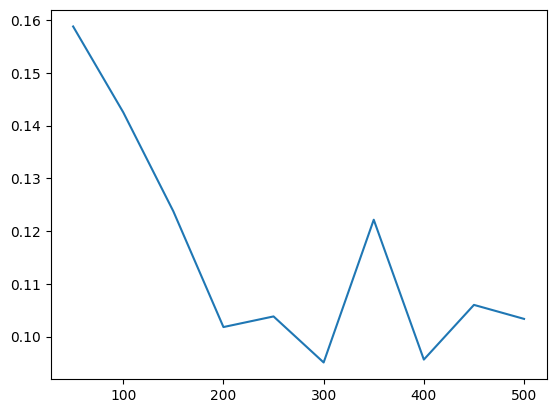

In [30]:
fig, ax = plt.subplots()
ax.plot(iterations, stdsPR[-1,:])
ax.plot(iterations, stdsLH[-1,:])
ax.plot(iterations, stdsORT[-1,:])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(samples, stdsPR[:,-1])
ax.plot(samples, stdsLH[:,-1])
ax.plot(samples, stdsORT[:,-1])
plt.show()